#### Name     : Priyank ankola
#### Linkedin : www.linkedin.com/in/ankola-priyank-88a86b338

* #### Tasks : Objectiv of the study : From the data, it is estimated that the salary of the employees is above the limit and the salary of the      employees is below the limit.

* #### Type of Data : salary data
* #### Model Used   : EDA, visualization of data, support vector classification 
* #### Title        : salary prediction

### visualization  :
* Income Class Imbalance
* Relationship between age and income
* Income Class Imbalance
* Relationship between gender and income
* Income Class Imbalance
* Relationship between marital status and income
* Income Class Imbalance

## Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

## Load data set

In [2]:
df = pd.read_csv('Train .csv')
df

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


In [3]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of                 ID  age   gender                    education  \
0        ID_TZ0000   79   Female         High school graduate   
1        ID_TZ0001   65   Female         High school graduate   
2        ID_TZ0002   21     Male        12th grade no diploma   
3        ID_TZ0003    2   Female                     Children   
4        ID_TZ0004   70     Male         High school graduate   
...            ...  ...      ...                          ...   
209494  ID_TZ99995   16   Female            7th and 8th grade   
209495  ID_TZ99996   78     Male   Bachelors degree(BA AB BS)   
209496  ID_TZ99997    8   Female                     Children   
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                      class education_institute  \
0                       NaN                 NaN   
1                       NaN                 NaN   
2        Federal government       

In [5]:
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [6]:
df.isnull().sum() / len(df) * 100

ID                                 0.000000
age                                0.000000
gender                             0.000000
education                          0.000000
class                             50.236517
education_institute               93.650566
marital_status                     0.000000
race                               0.000000
is_hispanic                        0.000000
employment_commitment              0.000000
unemployment_reason               96.887813
employment_stat                    0.000000
wage_per_hour                      0.000000
is_labor_union                    90.415706
working_week_per_year              0.000000
industry_code                      0.000000
industry_code_main                 0.000000
occupation_code                    0.000000
occupation_code_main              50.450837
total_employed                     0.000000
household_stat                     0.000000
household_summary                  0.000000
under_18_family                 

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop(['race','is_hispanic','is_labor_union','country_of_birth_father','veterans_admin_questionnaire','country_of_birth_mother','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg','old_residence_reg'],inplace=True,axis=1)

In [9]:
df.isnull().sum()

ID                                   0
age                                  0
gender                               0
education                            0
class                           105245
education_institute             196197
marital_status                       0
employment_commitment                0
unemployment_reason             202979
employment_stat                      0
wage_per_hour                        0
working_week_per_year                0
industry_code                        0
industry_code_main                   0
occupation_code                      0
occupation_code_main            105694
total_employed                       0
household_stat                       0
household_summary                    0
under_18_family                 151654
vet_benefit                          0
tax_status                           0
gains                                0
losses                               0
stocks_status                        0
citizenship              

In [10]:
df['education_institute'] = df.groupby('education')['education_institute'].transform(lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else 'High school graduate') 
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,College or university,Widowed,Not in labor force,NaN,0,...,0,292,Native,95,US,?,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,College or university,Widowed,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,College or university,Married-civilian spouse present,Not in labor force,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,Not in labor force,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,College or university,Married-civilian spouse present,Not in labor force,NaN,0,...,0,71,Native,95,US,?,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [11]:
df['occupation_code_main'].mode()

0     Adm support including clerical
Name: occupation_code_main, dtype: object

In [12]:
df['occupation_code_main'] = df.groupby('industry_code_main')['occupation_code_main'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Adm support including clerical')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,College or university,Widowed,Not in labor force,NaN,0,...,0,292,Native,95,US,?,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,College or university,Widowed,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,College or university,Married-civilian spouse present,Not in labor force,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,Not in labor force,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,College or university,Married-civilian spouse present,Not in labor force,NaN,0,...,0,71,Native,95,US,?,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [13]:
df['education'].mode()

0     High school graduate
Name: education, dtype: object

In [14]:
df['class'] = df.groupby('education')['class'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'High school graduate')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,NaN,0,...,0,292,Native,95,US,?,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,NaN,0,...,0,71,Native,95,US,?,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,NaN,0,...,0,0,Native,95,US,?,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,NaN,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [15]:
df['employment_commitment'].mode()

0     Children or Armed Forces
Name: employment_commitment, dtype: object

In [16]:
df['unemployment_reason'] = df.groupby('employment_commitment')['unemployment_reason'].transform(lambda x : x.fillna(x.mode()[0]) if not x.mode().empty else 'Children or Armed Forces')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,Children or Armed Forces,0,...,0,292,Native,95,US,?,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,71,Native,95,US,?,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,95,US,?,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [17]:
df[['unemployment_reason','employment_commitment']]

,unemployment_reason,employment_commitment
0,Children or Armed Forces,Not in labor force
1,Other job loser,Children or Armed Forces
2,Other job loser,Children or Armed Forces
3,Other job loser,Children or Armed Forces
4,Children or Armed Forces,Not in labor force
...,...,...
209494,Children or Armed Forces,Not in labor force
209495,Children or Armed Forces,Not in labor force
209496,Other job loser,Children or Armed Forces
209497,Other job loser,Children or Armed Forces


In [18]:
df.isnull().sum()

ID                                   0
age                                  0
gender                               0
education                            0
class                                0
education_institute                  0
marital_status                       0
employment_commitment                0
unemployment_reason                  0
employment_stat                      0
wage_per_hour                        0
working_week_per_year                0
industry_code                        0
industry_code_main                   0
occupation_code                      0
occupation_code_main                 0
total_employed                       0
household_stat                       0
household_summary                    0
under_18_family                 151654
vet_benefit                          0
tax_status                           0
gains                                0
losses                               0
stocks_status                        0
citizenship              

In [19]:
df['under_18_family'] = df.groupby('household_summary')['under_18_family'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Both parents present')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,Children or Armed Forces,0,...,0,292,Native,95,US,?,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,71,Native,95,US,?,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,95,US,?,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [20]:
df.isnull().sum()

ID                                   0
age                                  0
gender                               0
education                            0
class                                0
education_institute                  0
marital_status                       0
employment_commitment                0
unemployment_reason                  0
employment_stat                      0
wage_per_hour                        0
working_week_per_year                0
industry_code                        0
industry_code_main                   0
occupation_code                      0
occupation_code_main                 0
total_employed                       0
household_stat                       0
household_summary                    0
under_18_family                      0
vet_benefit                          0
tax_status                           0
gains                                0
losses                               0
stocks_status                        0
citizenship              

In [21]:
df['residence_1_year_ago'] = df.groupby('citizenship')['residence_1_year_ago'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Same')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,Children or Armed Forces,0,...,0,292,Native,95,US,?,Same,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,71,Native,95,US,?,Same,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,95,US,?,Same,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [22]:
df['residence_1_year_ago'] = df.groupby('residence_1_year_ago')['residence_1_year_ago'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Same')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,Children or Armed Forces,0,...,0,292,Native,95,US,?,Same,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,71,Native,95,US,?,Same,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,95,US,?,Same,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [23]:
df = df.replace({'migration_code_change_in_msa': '?' }, np.nan)
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,Children or Armed Forces,0,...,0,292,Native,95,US,?,Same,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,71,Native,95,US,?,Same,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,95,US,?,Same,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [24]:
df.isnull().sum()

ID                                   0
age                                  0
gender                               0
education                            0
class                                0
education_institute                  0
marital_status                       0
employment_commitment                0
unemployment_reason                  0
employment_stat                      0
wage_per_hour                        0
working_week_per_year                0
industry_code                        0
industry_code_main                   0
occupation_code                      0
occupation_code_main                 0
total_employed                       0
household_stat                       0
household_summary                    0
under_18_family                      0
vet_benefit                          0
tax_status                           0
gains                                0
losses                               0
stocks_status                        0
citizenship              

In [25]:
df[['country_of_birth_own']].mode()

,country_of_birth_own
0,US


In [26]:
df['migration_code_change_in_msa'] = df.groupby('country_of_birth_own')['migration_code_change_in_msa'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else '?')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,Children or Armed Forces,0,...,0,292,Native,95,US,?,Same,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,71,Native,95,US,?,Same,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,95,US,?,Same,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,NaN,3530.26,Below limit


In [27]:
df['old_residence_state'] = df.groupby('country_of_birth_own')['old_residence_state'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'US')
df

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,Widowed,Not in labor force,Children or Armed Forces,0,...,0,292,Native,95,US,?,Same,California,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,Widowed,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,California,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,California,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,California,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,California,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,Never married,Not in labor force,Children or Armed Forces,0,...,0,0,Native,95,US,?,Same,California,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,Married-civilian spouse present,Not in labor force,Children or Armed Forces,0,...,0,71,Native,95,US,?,Same,California,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,Never married,Children or Armed Forces,Other job loser,0,...,0,0,Native,95,US,?,Same,California,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,Married-civilian spouse present,Children or Armed Forces,Other job loser,0,...,0,0,Native,94,US,unchanged,Same,California,3530.26,Below limit


In [28]:
df.isnull().sum()

ID                              0
age                             0
gender                          0
education                       0
class                           0
education_institute             0
marital_status                  0
employment_commitment           0
unemployment_reason             0
employment_stat                 0
wage_per_hour                   0
working_week_per_year           0
industry_code                   0
industry_code_main              0
occupation_code                 0
occupation_code_main            0
total_employed                  0
household_stat                  0
household_summary               0
under_18_family                 0
vet_benefit                     0
tax_status                      0
gains                           0
losses                          0
stocks_status                   0
citizenship                     0
mig_year                        0
country_of_birth_own            0
migration_code_change_in_msa    0
residence_1_ye

In [29]:
df.columns.nunique()

33

* ## visualization

## income class imbalance

* ### This calculation shows how many employees are above the limit and how many are below the limit.

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64
Axes(0.2815,0.11;0.462x0.77)


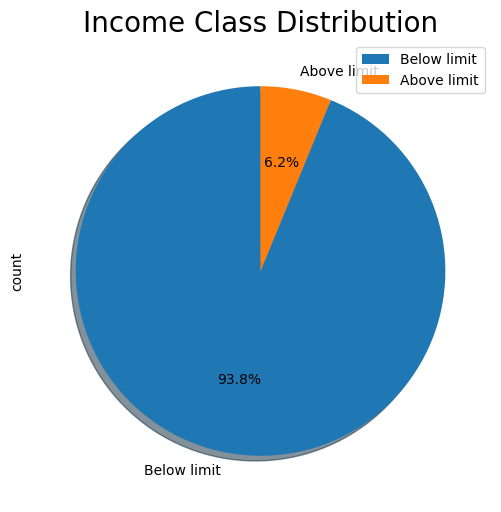

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Income Class Distribution', fontsize=20)
# plt.xlabel('Income Above Limit', fontsize=15)
# plt.ylabel('class', fontsize=15)
print(df["income_above_limit"].value_counts())
print(df["income_above_limit"].value_counts().plot.pie(autopct="%1.1f%%",startangle=90,shadow=True))
# sns.countplot(x='income_above_limit', hue='income_above_limit', data=df)
# plt.pie('income_above_limit',shadow=True)
plt.legend(loc=1)
plt.show()


## Relationship between age and income

*  ### The lower limit shows the age at which the child is born and the upper limit shows the age at which the child is born.

In [31]:
age = df.groupby('income_above_limit')['age'].value_counts()
print(age)

income_above_limit  age
Above limit         46     506
                    45     478
                    43     464
                    47     463
                    48     444
                          ... 
Below limit         85     434
                    86     334
                    87     304
                    88     261
                    89     205
Name: count, Length: 165, dtype: int64


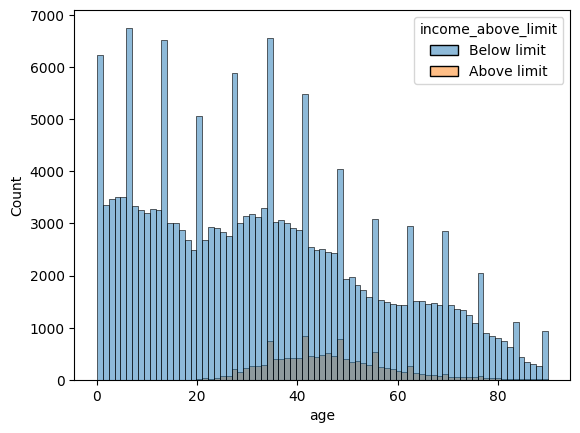

In [32]:
sns.histplot(x='age', hue='income_above_limit', data=df)
plt.show()

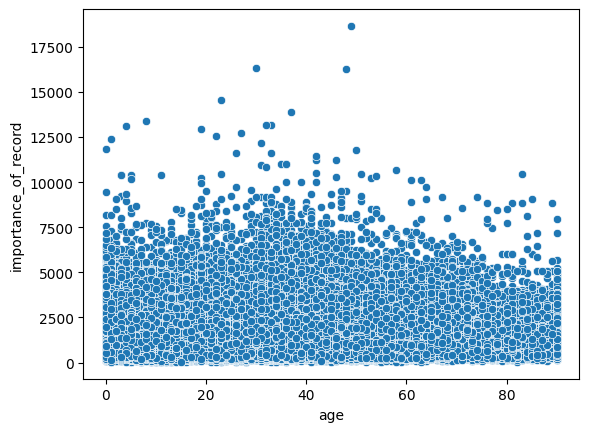

In [33]:
sns.scatterplot(x='age',y='importance_of_record',data=df)
plt.show()

## Income Class Imbalance -- count by age

* ### It shows that employees of different ages work in different categories.

In [34]:
class1 = df.groupby('class')['age'].value_counts()
print(class1)

class                 age
 Federal government   45      122
                      48      116
                      38      109
                      47      109
                      42      103
                             ... 
High school graduate  9      3251
                      14     3230
                      10     3204
                      1      3198
                      0      3041
Name: count, Length: 531, dtype: int64


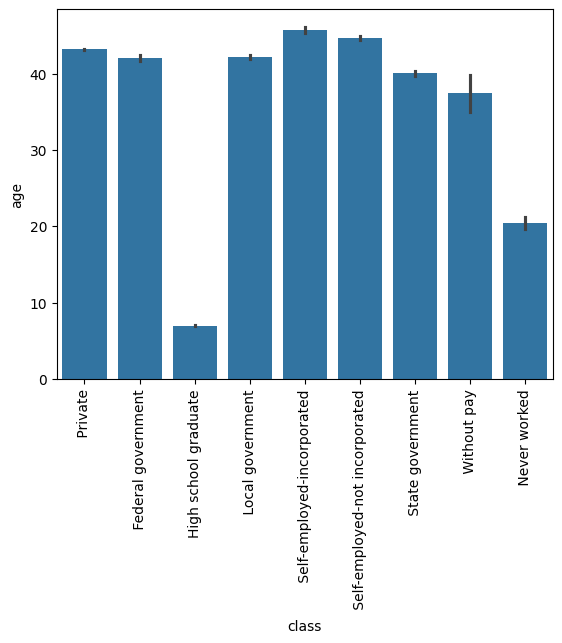

In [35]:
sns.barplot(x='class',y='age',data=df)
plt.xticks(rotation=90)
plt.show()

## Relationship between gender and income

* ### Gender equality means that Catalan's income is above the limit and Catalan's is below the limit.

income_above_limit  gender
Above limit         Male       10210
                    Female      2788
Below limit         Female    105996
                    Male       90505
Name: count, dtype: int64


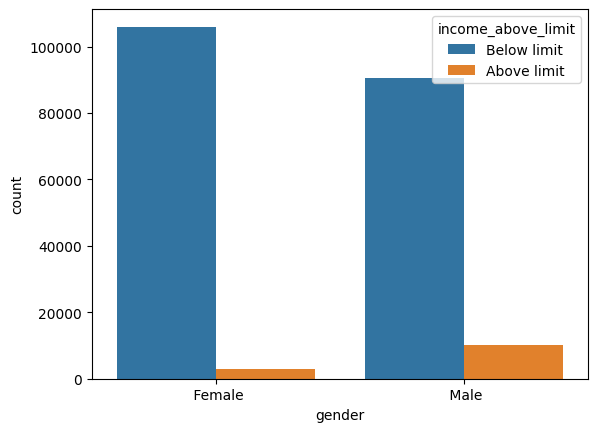

In [36]:
df1 = df.groupby('income_above_limit')['gender'].value_counts()
print(df1)
sns.countplot(x='gender', hue='income_above_limit', data=df)
plt.show()

##  Relationship between marital status and income

* ###  It shows the income class by how many men and women are above the limit and how many are below.

In [37]:
df['marital_status'].nunique(),df['marital_status'].unique()

(7,
 array([' Widowed', ' Never married', ' Married-civilian spouse present',
        ' Divorced', ' Married-spouse absent', ' Separated',
        ' Married-A F spouse present'], dtype=object))

In [38]:
df.replace([' Widowed',' Married-civilian spouse present',' Married-A F spouse present'],['married','married','married'],inplace=True)
df.replace([' Never married',' Divorced',' Married-spouse absent',' Separated'],['single','single','single','single'],inplace=True)

income_above_limit  marital_status
Above limit         married            10472
                    single              2526
Below limit         single            106817
                    married            89684
Name: count, dtype: int64


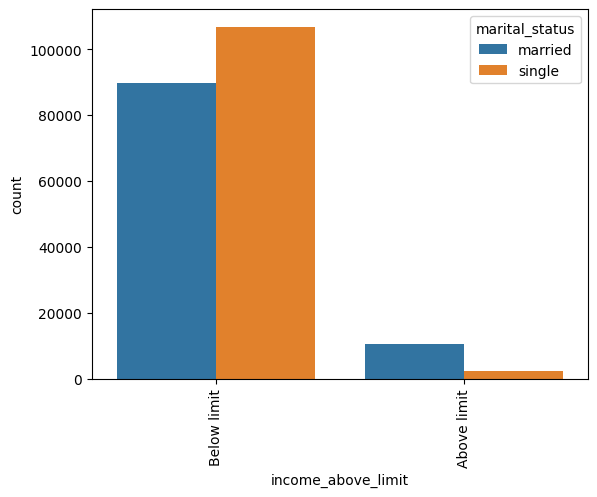

In [39]:
df2 = df.groupby('income_above_limit')['marital_status'].value_counts()
print(df2)
sns.countplot(x='income_above_limit',hue='marital_status',data=df)
plt.xticks(rotation=90)
plt.show()

## count by married and single

* ### Shows the total count of males and females.

In [40]:
df['marital_status'].value_counts()

marital_status
single     109343
married    100156
Name: count, dtype: int64

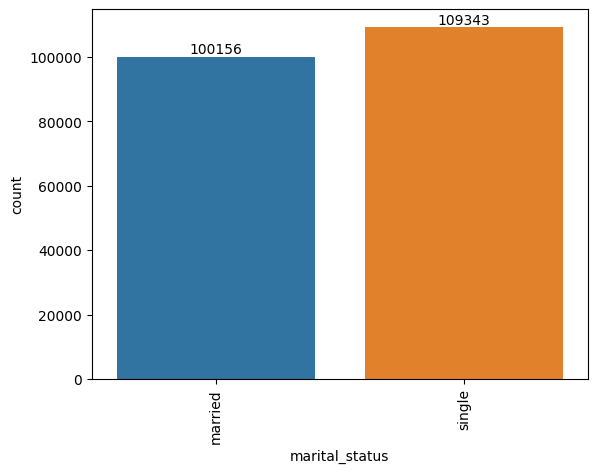

In [41]:
# Create count plot
ax = sns.countplot(x='marital_status', data=df, hue='marital_status')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Show plot
plt.show()

### Married and single count by category

* #### The total count of married and single in a different class shows which are married and which are single in that class.

In [42]:
df3 = df.groupby('marital_status')['class'].value_counts()
print(df3)

marital_status  class                          
married          Private                           79834
                 Self-employed-not incorporated     6796
                 Local government                   5707
                 State government                   2840
                 Self-employed-incorporated         2820
                 Federal government                 2005
                 Without pay                         107
                 Never worked                         41
                High school graduate                   6
single           Private                           51343
                High school graduate               49679
                 Local government                   2386
                 Self-employed-not incorporated     2161
                 State government                   1640
                 Federal government                 1042
                 Self-employed-incorporated          624
                 Never worked           

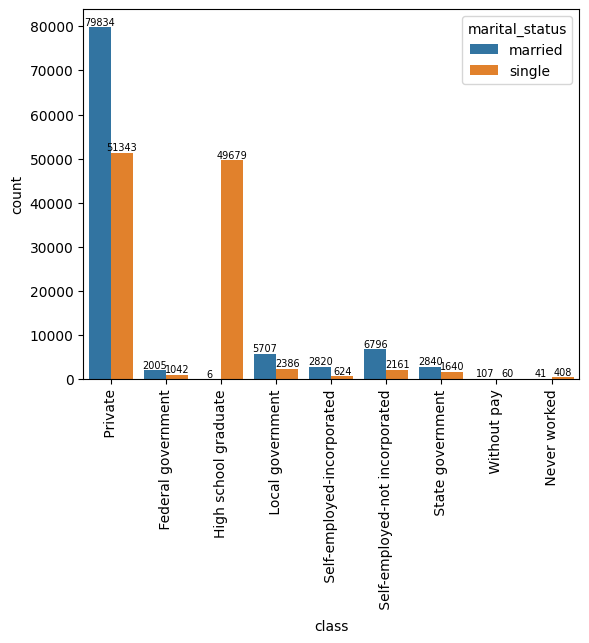

In [43]:
class1 = sns.countplot(x='class',data=df,hue='marital_status')
plt.xticks(rotation=90)
# Add bar labels
for bars in class1.containers:
    class1.bar_label(bars,fontsize = 7)
plt.show()

In [44]:
df.replace(['Below limit','Above limit'],[0,1],inplace=True)

In [45]:
x = df.drop('income_above_limit',axis=1)
y = df['income_above_limit']

print('shape of x', x.shape)
print('shape of y', y.shape)

shape of x (209499, 32)
shape of y (209499,)


In [46]:
x

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record
0,ID_TZ0000,79,Female,High school graduate,Private,College or university,married,Not in labor force,Children or Armed Forces,0,...,0,0,292,Native,95,US,?,Same,California,1779.74
1,ID_TZ0001,65,Female,High school graduate,Private,College or university,married,Children or Armed Forces,Other job loser,0,...,0,0,0,Native,94,US,unchanged,Same,California,2366.75
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,High school,single,Children or Armed Forces,Other job loser,0,...,0,0,0,Native,94,US,unchanged,Same,California,1693.42
3,ID_TZ0003,2,Female,Children,High school graduate,High school,single,Children or Armed Forces,Other job loser,0,...,0,0,0,Native,94,US,unchanged,Same,California,1380.27
4,ID_TZ0004,70,Male,High school graduate,Private,College or university,married,Not in labor force,Children or Armed Forces,0,...,0,0,0,Native,95,US,?,Same,California,1580.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Private,High school,single,Not in labor force,Children or Armed Forces,0,...,0,0,0,Native,95,US,?,Same,California,2170.60
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Private,College or university,married,Not in labor force,Children or Armed Forces,0,...,0,0,71,Native,95,US,?,Same,California,1029.57
209496,ID_TZ99997,8,Female,Children,High school graduate,High school,single,Children or Armed Forces,Other job loser,0,...,0,0,0,Native,95,US,?,Same,California,791.61
209497,ID_TZ99998,26,Female,Some college but no degree,Private,College or university,married,Children or Armed Forces,Other job loser,0,...,0,0,0,Native,94,US,unchanged,Same,California,3530.26


In [47]:
x.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'employment_commitment', 'unemployment_reason',
       'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'industry_code_main', 'occupation_code',
       'occupation_code_main', 'total_employed', 'household_stat',
       'household_summary', 'under_18_family', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'migration_code_change_in_msa',
       'residence_1_year_ago', 'old_residence_state', 'importance_of_record'],
      dtype='object')

In [48]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

# label   =  'ID','education','class','employment_commitment','industry_code_main','occupation_code_main','household_stat','household_summary','country_of_birth_own','migration_code_change_in_msa','old_residence_state'
# onehot  =   'gender','education_institute',marital_status','unemployment_reason','under_18_family','tax_status','citizenship','residence_1_year_ago','income_above_limit'
columns_to_encode = ['ID','education','class','employment_commitment','industry_code_main','occupation_code_main','household_stat','household_summary','country_of_birth_own','migration_code_change_in_msa','old_residence_state']
for col in columns_to_encode:
    x[col] = labelencoder.fit_transform(x[col])  
    
    

In [49]:
x

,ID,age,gender,education,class,education_institute,marital_status,employment_commitment,unemployment_reason,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,residence_1_year_ago,old_residence_state,importance_of_record
0,0,79,Female,12,3,College or university,married,2,Children or Armed Forces,0,...,0,0,292,Native,95,42,0,Same,6,1779.74
1,1,65,Female,12,3,College or university,married,0,Other job loser,0,...,0,0,0,Native,94,42,8,Same,6,2366.75
2,2,21,Male,2,0,High school,single,0,Other job loser,0,...,0,0,0,Native,94,42,8,Same,6,1693.42
3,3,2,Female,10,8,High school,single,0,Other job loser,0,...,0,0,0,Native,94,42,8,Same,6,1380.27
4,4,70,Male,12,3,College or university,married,2,Children or Armed Forces,0,...,0,0,0,Native,95,42,0,Same,6,1580.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,209494,16,Female,5,3,High school,single,2,Children or Armed Forces,0,...,0,0,0,Native,95,42,0,Same,6,2170.60
209495,209495,78,Male,9,3,College or university,married,2,Children or Armed Forces,0,...,0,0,71,Native,95,42,0,Same,6,1029.57
209496,209496,8,Female,10,8,High school,single,0,Other job loser,0,...,0,0,0,Native,95,42,0,Same,6,791.61
209497,209497,26,Female,16,3,College or university,married,0,Other job loser,0,...,0,0,0,Native,94,42,8,Same,6,3530.26


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20 , random_state=45)

In [51]:
print('shape of x_train', x_train.shape)
print('shape of y_train', y_train.shape)
print('shape of x_test', x_test.shape)
print('shape of y_test', y_test.shape)

shape of x_train (167599, 32)
shape of y_train (167599,)
shape of x_test (41900, 32)
shape of y_test (41900,)


In [52]:
pd.get_dummies(x,columns=['gender','education_institute','marital_status','unemployment_reason','under_18_family','tax_status','citizenship','residence_1_year_ago'], dtype="int")

,ID,age,education,class,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,...,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_Native,residence_1_year_ago_ No,residence_1_year_ago_Same
0,0,79,12,3,2,0,0,52,0,14,...,0,0,0,0,0,0,0,1,0,1
1,1,65,12,3,0,0,0,0,0,14,...,0,0,1,0,0,0,0,1,0,1
2,2,21,2,0,0,0,500,15,41,9,...,0,0,1,0,0,0,0,1,0,1
3,3,2,10,8,0,0,0,0,0,14,...,0,1,0,0,0,0,0,1,0,1
4,4,70,12,3,2,0,0,0,0,14,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,209494,16,5,3,2,0,0,0,0,14,...,0,1,0,0,0,0,0,1,0,1
209495,209495,78,9,3,2,0,0,0,0,14,...,0,0,0,0,0,0,0,1,0,1
209496,209496,8,10,8,0,0,0,0,0,14,...,0,1,0,0,0,0,0,1,0,1
209497,209497,26,16,3,0,0,700,52,32,23,...,0,0,0,0,0,0,0,1,0,1


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [55]:
x_train = ohe.fit_transform(x_train[['gender','education_institute','marital_status','unemployment_reason','under_18_family','tax_status','citizenship','residence_1_year_ago']])

In [56]:
x_test = ohe.fit_transform(x_test[['gender','education_institute','marital_status','unemployment_reason','under_18_family','tax_status','citizenship','residence_1_year_ago']])

In [57]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 1)
classifier.fit(x_train, y_train)

SVC(random_state=1)

In [58]:
y_pred = classifier.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[39261    37]
 [ 2466   136]]


0.9402625298329356

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [61]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[39261    37]
 [ 2466   136]]


0.9402625298329356

In [63]:
import pickle

In [64]:
with open ('model_pickle','wb') as file:
    pickle.dump(classifier,file)

In [65]:
with open ('model_pickle','rb') as f:
    mp = pickle.load(f)

In [66]:
df1 = pd.read_csv('Test .csv')
df1

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89781,ID_TZ299280,5,Male,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,US,?,?,?,?,NaN,NaN,NaN,938.83
89782,ID_TZ299281,81,Female,7th and 8th grade,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1985.66
89783,ID_TZ299282,65,Female,High school graduate,Federal government,NaN,Married-civilian spouse present,White,Other Spanish,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,552.74
89784,ID_TZ299283,38,Female,High school graduate,Private,NaN,Married-A F spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,1917.71


In [67]:
import joblib

In [68]:
joblib.dump(classifier,'model_joblib')

['model_joblib']

In [71]:
mj = joblib.load('model_joblib')

In [ ]:
model = load_model('path_to_your_model.h5')

## Conclusion
Our analysis of income distribution revealed significant class imbalances, highlighting disparities among different demographic and professional groups.

* Age and Income: A clear relationship exists between age and income, with older individuals generally earning more, reflecting career progression over time.
* Gender and Income: A noticeable income gap persists across genders, suggesting underlying structural differences in earnings.
* Marital Status and Income: Married individuals tend to have higher income levels compared to their single counterparts, potentially due to dual-income households or financial stability.
* Professional Class Distribution: The treemap visualization illustrates the varying number of participants across different professional classes, emphasizing the dominance of certain job sectors in income distribution.